In [1]:
from torchvision.datasets import Cityscapes

import torch
print(torch.__version__)
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import sys

2.1.2


In [2]:
print('__Python VERSION: ', sys.version)
print('__PyTorch VERSION: ', torch.__version__)
print('__CUDA VERSION', )
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
print('Active CUDA Device: GPU', torch.cuda.current_device())
print('Available devices ', torch.cuda.device_count())
print('Current cuda device ', torch.cuda.current_device())

__Python VERSION:  3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]
__PyTorch VERSION:  2.1.2
__CUDA VERSION
__CUDNN VERSION: 8700
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0


In [3]:
# Check if GPU is avaliable on your system
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on {device}")

Training on cuda


In [4]:
import torchvision.transforms as transforms
import augmentations as A

# Define the transformations
data_transforms = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to PyTorch Tensor
    transforms.Resize((256,256))
])

# Define a list of transformations
augment_tranmforms = [A.Resize((256, 256)),
                    A.RandomHorizontalFlip(),
                    A.RandomRotation(degrees=(-35, 35)),
                    A.RandomCropWithProbability(220, 0.5),
                    A.ToTensor()]

# Instanciate the Compose class with the list of transformations
augment_transforms = A.Compose(augment_tranmforms)


dataset_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\archive'

# Create transformed train dataset
training_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transform=data_transforms, target_transform=data_transforms)

# Create augmented train dataset
augmented_dataset = Cityscapes(dataset_path, split='train', mode='fine', target_type='semantic', transform=data_transforms, target_transform=augment_transforms)

# Create transformed train dataset
validation_dataset = Cityscapes(dataset_path, split='val', mode='fine', target_type='semantic', transform=data_transforms, target_transform=data_transforms)

c:\Users\jakub\anaconda3\envs\experiments\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


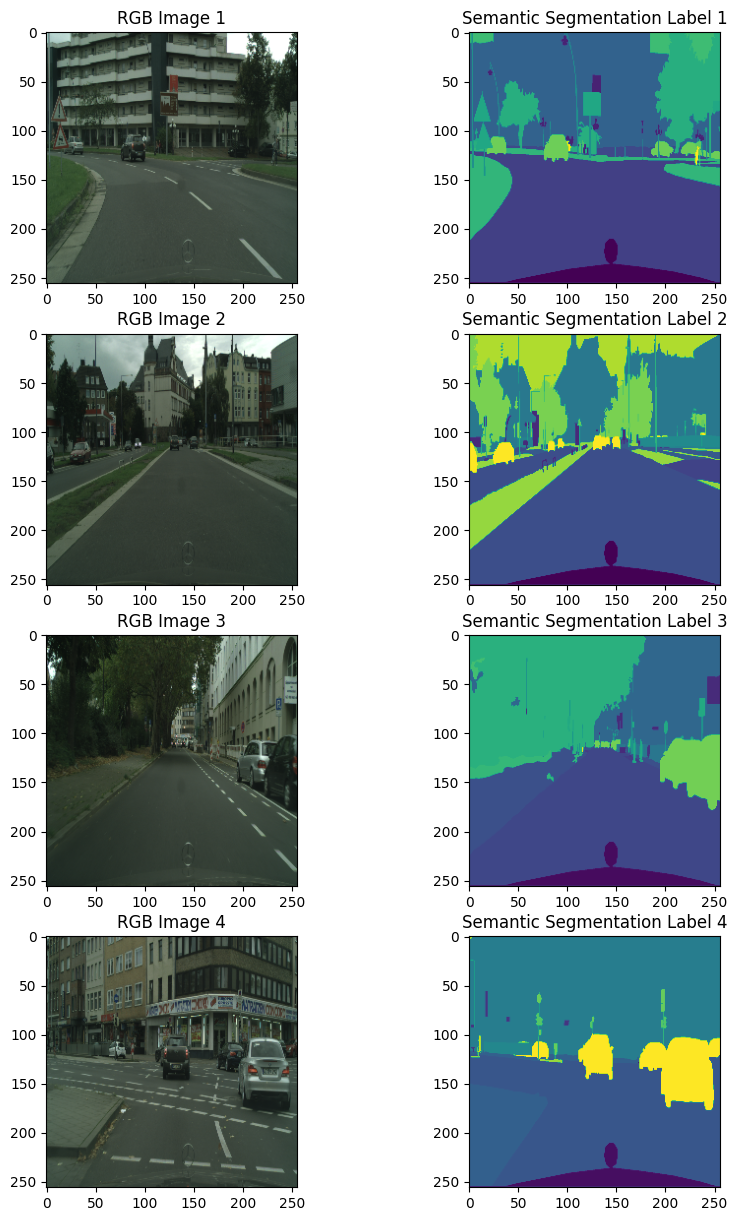

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 2, figsize=(10, 15))

for i in range(4):
    # TO DO: spec the fig size
    img, lbl = training_dataset[i]

    img_np = img.permute(1, 2, 0)
    lbl_np = lbl.permute(1, 2, 0)

    plt.subplot(4, 2, 2 * i + 1)
    plt.imshow(img_np)
    plt.title(f'RGB Image {i+1}')

    plt.subplot(4, 2, 2 * i + 2)
    plt.imshow(lbl_np)  # Adjust the colormap as needed
    plt.title(f'Semantic Segmentation Label {i+1}')

# Adjust layout to prevent overlap
# plt.tight_layout()
    
# Save a figure to a PNG format file
# plt.savefig('Cityspace-test-vis.png')

plt.show()

In [6]:
from torch.utils.data import ConcatDataset, DataLoader, random_split

# Combine the datasets
combined_dataset = ConcatDataset([training_dataset, augmented_dataset])

# Determine the lengths of the training and validation sets
total_size = len(combined_dataset)
train_size = int(0.8 * total_size)  # 80% for training
val_size = total_size - train_size  # 20% for validation

# Split the datasets
train_dataset, val_dataset = random_split(combined_dataset, [train_size, val_size])

# Create the dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, 
                                pin_memory=True if torch.cuda.is_available() else False)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, 
                                pin_memory=True if torch.cuda.is_available() else False)

In [7]:
# # Get the first batch of data
# images, masks = next(iter(train_dataloader))

# # Print the shapes of the images and masks
# print(f'Images shape: {images.shape}')
# print(f'Masks shape: {masks.shape}')

In [8]:
# Create training and validation dataloaders
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=10, shuffle=True, num_workers=2,
                                            pin_memory=True if torch.cuda.is_available() else False)

# val_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=10, shuffle=True, num_workers=2,
#                                             pin_memory=True if torch.cuda.is_available() else False)


## Training Model

In [9]:
# from model import Model
# import model_executables as mex

# # Instanciate the model
# UNet_model = Model()

# # Move the model to the GPU if avaliable
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# UNet_model = UNet_model.to(device)

# criterion = nn.CrossEntropyLoss(ignore_index=255)
# optimizer = optim.Adam(UNet_model.parameters(), lr=0.01)

# # Train the instanciated model
# mex.train_model(UNet_model, train_dataloader, val_dataloader, num_epochs=2, patience=3, criterion=criterion, optimizer=optimizer)


In [10]:
# Create a test dataset
# Create transformed train dataset
test_dataset = Cityscapes(dataset_path, split='test', mode='fine', target_type='semantic', transform=data_transforms, target_transform=data_transforms)
# Create a test data loader
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True, num_workers=2,
                                            pin_memory=True if torch.cuda.is_available() else False)

In [11]:
from utils import LABELS

class_colors = {label.name: label.color for label in LABELS}

# for class_name, color in class_colors.items():
#     print(f"{class_name}: {color}")

colors_cityspace = [label.color for label in LABELS]
class_names_cityspace = [label.name for label in LABELS]


# Create a dictionary that maps class names to class colors
class_colors = {i: color for i, color in enumerate(colors_cityspace)}

# Crete a dictionary that maps class names to class colors
class_names = {i: name for i, name in enumerate(class_names_cityspace)}

print(class_colors)



{0: (0, 0, 0), 1: (0, 0, 0), 2: (0, 0, 0), 3: (0, 0, 0), 4: (0, 0, 0), 5: (111, 74, 0), 6: (81, 0, 81), 7: (128, 64, 128), 8: (244, 35, 232), 9: (250, 170, 160), 10: (230, 150, 140), 11: (70, 70, 70), 12: (102, 102, 156), 13: (190, 153, 153), 14: (180, 165, 180), 15: (150, 100, 100), 16: (150, 120, 90), 17: (153, 153, 153), 18: (153, 153, 153), 19: (250, 170, 30), 20: (220, 220, 0), 21: (107, 142, 35), 22: (152, 251, 152), 23: (70, 130, 180), 24: (220, 20, 60), 25: (255, 0, 0), 26: (0, 0, 142), 27: (0, 0, 70), 28: (0, 60, 100), 29: (0, 0, 90), 30: (0, 0, 110), 31: (0, 80, 100), 32: (0, 0, 230), 33: (119, 11, 32), 34: (0, 0, 142)}


In [12]:
# Create a mapping from trainId to color
trainId_to_color = {label.trainId: label.color for label in LABELS if label.trainId != 255}
trainId_to_color_gt = {label.id: label.color for label in LABELS if label.trainId != 255}

for (trainId, color), (gtId, gtColor) in zip(trainId_to_color.items(), trainId_to_color_gt.items()):
    print(f"Train ID: {trainId}, Color: {color}, GT ID: {gtId}, GT Color: {gtColor}")

Train ID: 0, Color: (128, 64, 128), GT ID: 7, GT Color: (128, 64, 128)
Train ID: 1, Color: (244, 35, 232), GT ID: 8, GT Color: (244, 35, 232)
Train ID: 2, Color: (70, 70, 70), GT ID: 11, GT Color: (70, 70, 70)
Train ID: 3, Color: (102, 102, 156), GT ID: 12, GT Color: (102, 102, 156)
Train ID: 4, Color: (190, 153, 153), GT ID: 13, GT Color: (190, 153, 153)
Train ID: 5, Color: (153, 153, 153), GT ID: 17, GT Color: (153, 153, 153)
Train ID: 6, Color: (250, 170, 30), GT ID: 19, GT Color: (250, 170, 30)
Train ID: 7, Color: (220, 220, 0), GT ID: 20, GT Color: (220, 220, 0)
Train ID: 8, Color: (107, 142, 35), GT ID: 21, GT Color: (107, 142, 35)
Train ID: 9, Color: (152, 251, 152), GT ID: 22, GT Color: (152, 251, 152)
Train ID: 10, Color: (70, 130, 180), GT ID: 23, GT Color: (70, 130, 180)
Train ID: 11, Color: (220, 20, 60), GT ID: 24, GT Color: (220, 20, 60)
Train ID: 12, Color: (255, 0, 0), GT ID: 25, GT Color: (255, 0, 0)
Train ID: 13, Color: (0, 0, 142), GT ID: 26, GT Color: (0, 0, 142)
Tr

In [13]:
# import random

# Existing color coding for the first 35 classes
# colors_cityscapes = {
#     0: (0, 0, 0),
#     1: (138, 187, 36),
#     2: (138, 94, 28),
#     3: (68, 193, 94),
#     4: (0, 143, 21),
#     5: (122, 210, 11),
#     6: (120, 177, 17),
#     7: (152, 2, 32),
#     8: (173, 251, 20),
#     9: (79, 45, 163),
#     10: (95, 149, 240),
#     11: (179, 195, 232),
#     12: (205, 22, 174),
#     13: (143, 112, 157),
#     14: (120, 249, 119),
#     15: (154, 100, 13),
#     16: (17, 175, 253),
#     17: (10, 18, 16),
#     18: (67, 65, 54),
#     19: (132, 94, 164),
#     20: (205, 85, 169),
#     21: (6, 242, 80),
#     22: (45, 104, 119),
#     23: (122, 163, 180),
#     24: (81, 47, 145),
#     25: (150, 168, 7),
#     26: (6, 147, 255),
#     27: (200, 55, 78),
#     28: (208, 149, 214),
#     29: (2, 241, 14),
#     30: (12, 148, 250),
#     31: (153, 181, 176),
#     32: (92, 40, 146),
#     33: (252, 53, 128),
#     34: (80, 132, 172),
#     35: (179, 17, 75),
#     255: (255, 255, 255)
# }

# Class names for the first 35 classes
# class_names_cityscapes = [
#     'unlabeled','ego vehicle', 'rectification border', 'out of roi', 'static', 'dynamic', 'ground', 'road', 'sidewalk',
#     'parking', 'rail track', 'building', 'wall', 'fence', 'guard rail', 'bridge', 'tunnel', 'pole', 'polegroup',
#     'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus',
#     'caravan', 'trailer', 'train', 'motorcycle', 'bicycle', 'license plate'
# ]

# color_list = []
# # Generate random colors for the remaining classes (22 to 34)
# for i in range(len(class_names_cityscapes_updated)):
#     color_list.append([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)])

# # Print the updated color coding
# for idx, color in enumerate(color_list):
#     print(f"{idx}: {color}")

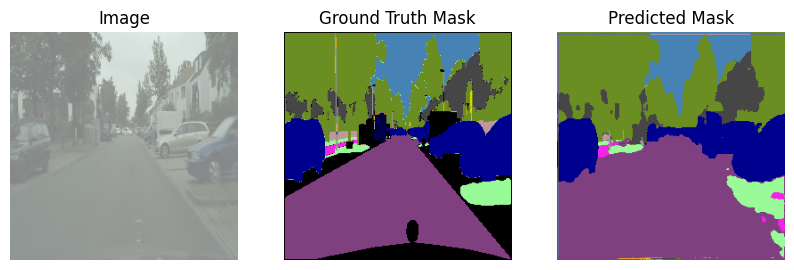

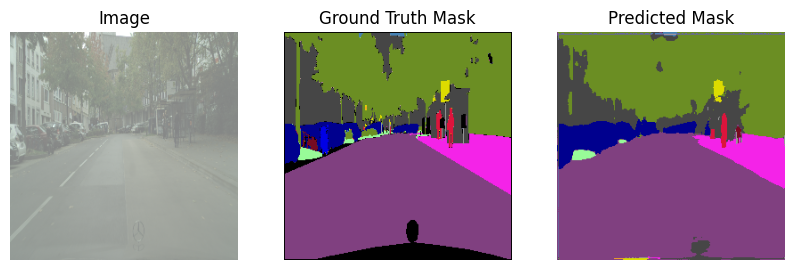

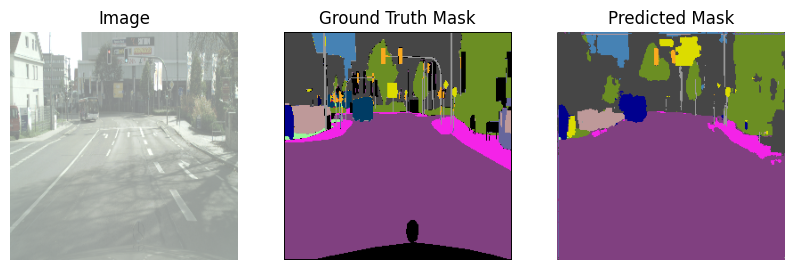

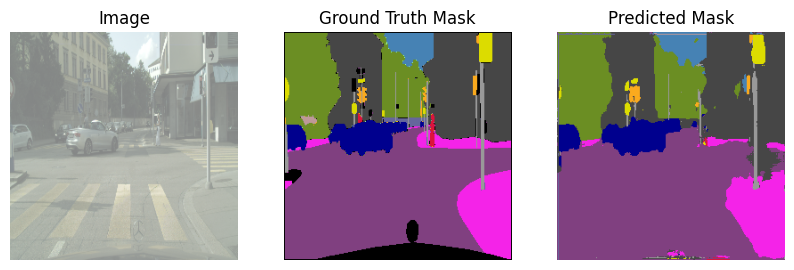

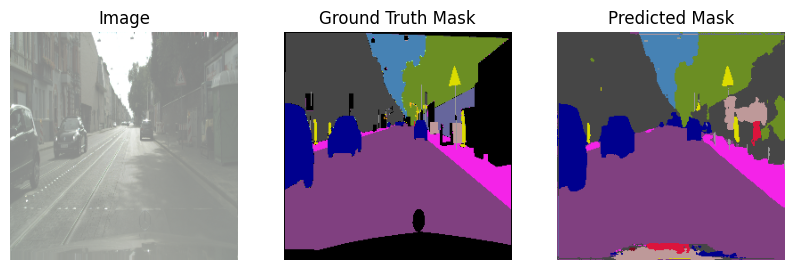

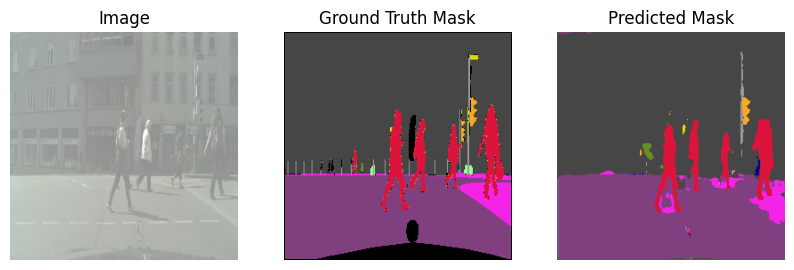

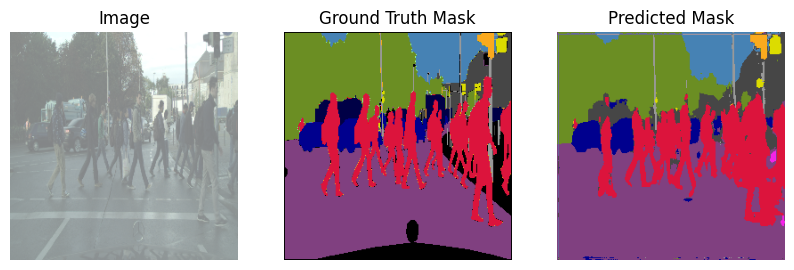

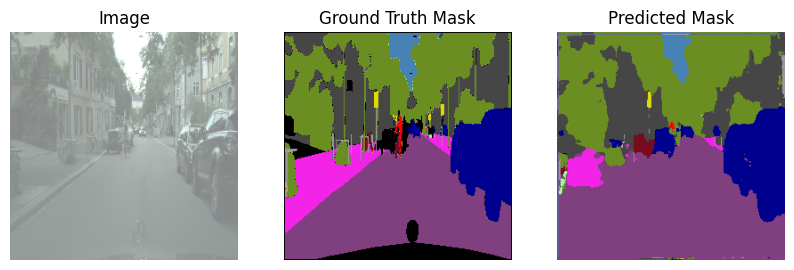

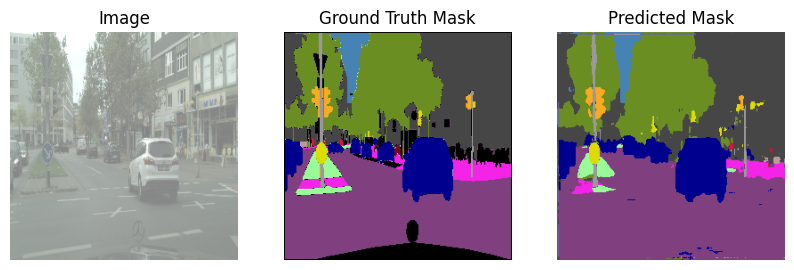

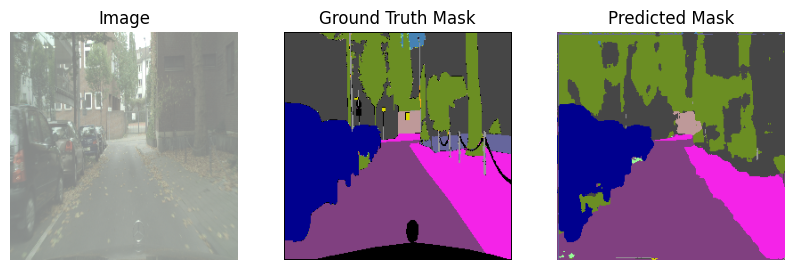

In [14]:
from model import Model
from model_vis import visualize_segmentation_cityscapes

# Instanciate Model()
eval_model = Model()

# Specify the checkpoint file path
checkpoint_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model_checkpoint_epoch_60_Mar21.pth'
device = torch.device('cpu') 

checkpoint = torch.load(checkpoint_path, map_location=device)
eval_model.load_state_dict(checkpoint)

# Call the function with the checkpoint path
visualize_segmentation_cityscapes(eval_model, train_loader, num_examples=1)

In [ ]:
# Load in the checkpoint file and saving a new one with soely the model.state_dict

# Instanciate Model()
# model = Model()

# Specify the checkpoint file path
# checkpoint_path = 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model_checkpoint_epoch_50.pth'
# device = torch.device('cpu') 

# checkpoint = torch.load(checkpoint_path, map_location=device)
# model.load_state_dict(checkpoint['model_state_dict'])

# torch.save(model.state_dict(), 'C:\\Users\\jakub\\Desktop\\TUe\\AIES\\Q3\\5LSM0-Neural-networks-for-computer-vision\\FinalAssignment\\model_checkpoints\\model.pth')